In [258]:
from Bio import SeqIO
import pandas as pd
import time as t
from collections import Counter
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [217]:
# implementation of avl tree

class Node(object):
    def __init__(self, data, val, sp, var):
        self.variant = var
        self.species = sp
        self.data = data
        self.value = val
        self.parent = None
        self.height = 0
        self.left_child = None
        self.right_child = None


class AVLTree(object):

    def __init__(self):
        self.root = None
            
            
    def insert(self, data, val, sp, var):
        if self.root is None:
            self.root = Node(data, val, sp, var)
        else:
            new_node = self._insert(self.root, data, val, sp, var)
            self._walk_up(new_node)

    def _insert(self, node, data, val, sp, var):
        if data <= node.data:
            if not node.left_child:
                node.left_child = Node(data, val, sp, var)
                node.left_child.parent = node
                return node.left_child
            return self._insert(node.left_child, data, val, sp, var)
        else:
            if not node.right_child:
                node.right_child = Node(data, val, sp, var)
                node.right_child.parent = node
                return node.right_child
            return self._insert(node.right_child, data, val, sp, var)

    def remove(self, data):
        if not self.root:
            raise ValueError('Tree is empty.')
        self._delete_value(data)

    def _delete_value(self, data):
        node = self.find(data, self.root)
        if node is False:
            raise ValueError('No node with value {}'.format(data))
        parent_of_deleted_node = self._delete_node(node)
        # if parent is None we know that we just deleted the root node,
        # but if root node had a child, that child is now the root node!
        if not parent_of_deleted_node and self.root:
            parent_of_deleted_node = self.root
        self._walk_up(parent_of_deleted_node)

    def find(self, value, node):
        if node is None:
            return False
        if node.data > value:
            return self.find(value, node.left_child)
        elif node.data < value:
            return self.find(value, node.right_child)
        return node

    def _delete_node(self, node):
        parent_node = node.parent
        num_child = self._num_children(node)

        if num_child == 0:
            # If there is no parent then 'node' is the root node.
            # 'node' has no children, so set root to point to None.
            if not parent_node:
                self.root = None
            elif parent_node.left_child == node:
                parent_node.left_child = None
            else:
                parent_node.right_child = None
            return parent_node

        elif num_child == 1:
            if node.left_child:
                child = node.left_child
            else:
                child = node.right_child

            if not parent_node:
                self.root = child
            elif parent_node.left_child == node:
                parent_node.left_child = child
            else:
                parent_node.right_child = child
            child.parent = parent_node
            return parent_node

        else:
            successor = self._max_node(node.left_child)
            node.data = successor.data
            self._delete_node(successor)

    @staticmethod
    def _num_children(node):
        num_children = 0
        if node.left_child:
            num_children += 1
        if node.right_child:
            num_children += 1
        return num_children

    def _walk_up(self, node):
        if not node:
            return
        else:
            self._check_node(node)
            return self._walk_up(node.parent)

    def _check_node(self, node):
        left_height = -1
        right_height = -1
        if node.left_child:
            left_height = node.left_child.height
        if node.right_child:
            right_height = node.right_child.height
        if abs(left_height - right_height) > 1:
            if left_height < right_height:
                self.left_rotate(node, node.right_child)
            else:
                self.right_rotate(node, node.left_child)
        else:
            node.height = max(left_height, right_height) + 1

    def left_rotate(self, node, child_node):
        if child_node.left_child:
            node.right_child = child_node.left_child
            node.right_child.parent = node
        else:
            node.right_child = None

        if node != self.root:
            child_node.parent = node.parent
            if node.parent.right_child == node:
                node.parent.right_child = child_node
            else:
                node.parent.left_child = child_node
        else:
            child_node.parent = None
            # because we are not replacing the parent node('node') with the
            # child node('child_node'), self.root is still pointing at the parent node.
            self.root = child_node

        child_node.left_child = node
        node.parent = child_node

        node.height -= 1

    def right_rotate(self, node, child_node):
        if child_node.right_child:
            node.left_child = child_node.right_child
            node.left_child.parent = node
        else:
            node.left_child = None

        if node != self.root:
            child_node.parent = node.parent
            if node.parent.right_child == node:
                node.parent.right_child = child_node
            else:
                node.parent.left_child = child_node
            # node.parent.left_child = child_node
        else:
            child_node.parent = None
            self.root = child_node

        child_node.right_child = node
        node.parent = child_node

        node.height -= 1

    def _min_node(self, node):
        if node.left_child:
            return self._min_node(node.left_child)
        return node

    def _max_node(self, node):
        if node.right_child:
            return self._max_node(node.right_child)
        return node

    def traverse(self, method='in'):
        if not self.root:
            return iter(())
        if method == 'in':
            return self._traverse_inorder(self.root)
        elif method == 'pre':
            return self._traverse_preorder(self.root)
        elif method == 'post':
            return self._traverse_postorder(self.root)
        else:
            raise ValueError('method must be either "in", "pre" or "post".')

    # left subtree -> root -> right subtree
    def _traverse_inorder(self, node):
        if node.left_child:
            yield from self._traverse_inorder(node.left_child)
        yield node
        if node.right_child:
            yield from self._traverse_inorder(node.right_child)

    # root -> left subtree -> right subtree
    def _traverse_preorder(self, node):
        yield node
        if node.left_child:
            yield from self._traverse_inorder(node.left_child)
        if node.right_child:
            yield from self._traverse_inorder(node.right_child)

    # left subtree -> right subtree -> root
    def _traverse_postorder(self, node):
        if node.left_child:
            yield from self._traverse_inorder(node.left_child)
        if node.right_child:
            yield from self._traverse_inorder(node.right_child)
        yield node

In [241]:
his_table = pd.read_csv('histones.csv')
new_rows = pd.DataFrame({'accession': ['1KX5_A', '1KX5_B', '1KX5_C', '1KX5_D'],
                         'type': ['H3', 'H4', 'H2A', 'H2B'],
                         'variant_group': ['cH3', 'cH4', 'cH2A', 'cH2B'],
                         'taxonomy_id': [8355, 8355, 8355, 8355],
                         'organism': ['Xenopus laevis', 'Xenopus laevis', 'Xenopus laevis', 'Xenopus laevis']})
his_table = pd.concat([his_table, new_rows], ignore_index=True)


his_table.tail()

,accession,type,variant_group,variant,doublet,gi,ncbi_gene_id,hgnc_gene_name,taxonomy_id,organism,phylum,class,taxonomy_group,info,references,sequence
412,XP_011105792.1,H1,scH1,scH1,NaN,748455219,NaN,NaN,1160507,Saccharomyces arboricola H-6,Ascomycota,Saccharomycetes,NaN,NaN,NaN,MAPKKTSTKTTTTNKGKKPVTSKGKDKPVIKTAVKKNAAKKEEPSS...
413,1KX5_A,H3,cH3,NaN,NaN,NaN,NaN,NaN,8355,Xenopus laevis,NaN,NaN,NaN,NaN,NaN,NaN
414,1KX5_B,H4,cH4,NaN,NaN,NaN,NaN,NaN,8355,Xenopus laevis,NaN,NaN,NaN,NaN,NaN,NaN
415,1KX5_C,H2A,cH2A,NaN,NaN,NaN,NaN,NaN,8355,Xenopus laevis,NaN,NaN,NaN,NaN,NaN,NaN
416,1KX5_D,H2B,cH2B,NaN,NaN,NaN,NaN,NaN,8355,Xenopus laevis,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
def get_species(record, df):
    acc = record.id
    request = df.loc[df['accession'] == acc]['organism']
    try:
        species = request.iloc[0]
    except IndexError:
        print('species error', record.description, record.seq, '\n')
        return None
    else:
        return species


In [243]:
def get_variant(record, df):
    acc = record.id
    request = df.loc[df['accession'] == acc]['variant_group']
    try:
        variant = request.iloc[0]
    except IndexError:
        print('variant error', record, record.description, '\n')
        return None
    else:
        return variant

In [255]:
# open files aligned by its type

tree = AVLTree()

path = 'new_alignments'
h1 = open(path + '/H1.fasta')
h2a = open(path + '/H2A.fasta')
h2b = open(path + '/H2B.fasta')
h3 = open(path + '/H3.fasta')
h4 = open(path + '/H4.fasta')


# add histone alignments from files into the avl_tree. Each H1 histone is assigned with id that gives
#remainder of 0 when devided by 5, H2A histone give remainders of 1, H2B - 2, H3 - 3, H4 - 4.
#After obtaining following id increase by 5

start = t.time()

files = [h1, h2a, h2b, h3, h4]
types = ['H1', 'H2A', 'H2B', 'H3', 'H4']
rests = {'H1': 0, 'H2A': 1, 'H2B': 2, 'H3':  3, 'H4': 4} #division rests
id_counter = {'H1': 0, 'H2A': 1, 'H2B': 2, 'H3':  3, 'H4': 4}
core_his_dict = {} # dictionaty for nucleosomal histones
his_counter = 0
his_type_counter = {'H1': 0, 'H2A': 0, 'H2B': 0, 'H3': 0, 'H4': 0}
i = -1


for file in files:
    i += 1
    cur_his_type = types[i]
    for record in SeqIO.parse(file, 'fasta'):
        his_type_counter[cur_his_type] += 1
        species = get_species(record, his_table)
        variant = get_variant(record, his_table)
        if '1KX5' in record.id:
            core_his_dict[cur_his_type] = record
        his_id = id_counter[cur_his_type]
        id_counter[cur_his_type] += 5
        his_counter += 1
        tree.insert(his_id, record, species, variant)
        if '1KX5' in record.id:
            core_his_dict[cur_his_type] = record


for file in files:
    file.close()

print(t.time() - start)
print(his_counter)
print(id_counter)
print(core_his_dict)
print(his_type_counter)

0.6621196269989014
411
{'H1': 285, 'H2A': 861, 'H2B': 387, 'H3': 393, 'H4': 139}
{'H2A': SeqRecord(seq=Seq('------------------------------------------------------...---', SingleLetterAlphabet()), id='1KX5_C', name='1KX5_C', description='1KX5_C Chain C, histone H2A [Xenopus laevis]', dbxrefs=[]), 'H2B': SeqRecord(seq=Seq('------------------------------------------------------...---', SingleLetterAlphabet()), id='1KX5_D', name='1KX5_D', description='1KX5_D histone H2B canonical [Xenopus laevis]', dbxrefs=[]), 'H3': SeqRecord(seq=Seq('---------------------AR-------------------------------...---', SingleLetterAlphabet()), id='1KX5_A', name='1KX5_A', description='1KX5_A Chain A, histone H3 [Xenopus laevis]', dbxrefs=[]), 'H4': SeqRecord(seq=Seq('-SGRGKGGK-GLGKGGAKRH-RKVLRDNIQGITKPAIRRLARRGGVKRISGLIY...FGG', SingleLetterAlphabet()), id='1KX5_B', name='1KX5_B', description='1KX5_B Chain B, histone H4 [Xenopus laevis]', dbxrefs=[])}
{'H1': 57, 'H2A': 172, 'H2B': 77, 'H3': 78, 'H4': 27}


In [247]:
# read contact table and delit letters p and d from histone names

conts = pd.read_csv('../histone_contacts.csv')
display(conts)
conts['A_entity'] = [his[:-1] for his in conts['A_entity']]
conts['B_entity'] = [his[:-1] for his in conts['B_entity']]
conts = conts.loc[conts['A_entity'] != conts['B_entity']]

for i, row in tqdm(conts.iterrows(), total=len(conts)):
    a_resid, b_resid = row['A_resid'], row['B_resid']
    a_resname, b_resname = row['A_resname'], row['B_resname']
    a_his, b_his = row['A_entity'], row['B_entity']

    
    req = conts.loc[(conts['A_resid']==b_resid) & (conts['B_resid']==a_resid) &
                     (conts['A_resname']==b_resname) & (conts['B_resname']==a_resname) &
                   (conts['A_entity']==b_his) & (conts['B_entity']==a_his)]
    if len(req) >= 2:
        drop_ind = req.iloc[1:].index
        conts.drop(index=drop_ind, inplace=True)

identical = conts.loc[(conts['A_resname']==conts['B_resname']) & (conts['A_resid']==conts['B_resid'])
                      & (conts['A_entity']==conts['B_entity'])].index        
conts.drop(index=identical, inplace=True)
conts.reset_index()



,Unnamed: 0,A_segid,A_resid,A_resname,B_segid,B_resid,B_resname,num_int,A_entity,B_entity
0,0,A,1,A,A,1,A,11,H3p,H3p
1,1,A,1,A,A,2,R,18,H3p,H3p
2,2,A,2,R,A,1,A,18,H3p,H3p
3,3,A,2,R,A,2,R,34,H3p,H3p
4,4,A,2,R,A,3,T,16,H3p,H3p
...,...,...,...,...,...,...,...,...,...,...
8323,8323,H,121,A,H,122,K,15,H2Bd,H2Bd
8324,8324,H,122,K,G,6,Q,2,H2Bd,H2Ad
8325,8325,H,122,K,G,20,R,11,H2Bd,H2Ad
8326,8326,H,122,K,H,121,A,15,H2Bd,H2Bd


,index,Unnamed: 0,A_segid,A_resid,A_resname,B_segid,B_resid,B_resname,num_int,A_entity,B_entity
0,202,202,A,44,G,B,44,K,2,H3,H4
1,227,227,A,47,A,B,39,R,5,H3,H4
2,228,228,A,47,A,B,44,K,1,H3,H4
3,238,238,A,48,L,B,44,K,2,H3,H4
4,239,239,A,48,L,G,115,L,2,H3,H2A
...,...,...,...,...,...,...,...,...,...,...,...
595,7916,7916,H,79,H,G,39,Y,1,H2B,H2A
596,8088,8088,H,98,L,F,92,R,2,H2B,H4
597,8098,8098,H,99,L,G,96,L,1,H2B,H2A
598,8248,8248,H,114,A,G,23,L,1,H2B,H2A


In [248]:
def get_column_index(pos, his_type, core_dict, debug=False):
    seq = core_dict[his_type].seq
    column = -1
    res_counter = 0
    
    while res_counter < pos:
        column += 1
        cur_feature = seq[column]
        if cur_feature != '-':
            res_counter += 1
        if debug:
            print(cur_feature, res_counter, column)
            
    return column
   
pos = 3
his_type = 'H3'
print(get_column_index(pos, his_type, core_his_dict))

114


In [249]:
start = t.time()


res_dict = {key: [] for key in ['species', 'a_resid', 'b_resid', 'a_entity', 'b_entity', 'a_resname',\
                        'b_resname', 'a_new_resname', 'b_new_resname', 'a_variant', 'b_variant',\
                               'a_accsession', 'b_accsession', 'a_column', 'b_column']}


for j, row in tqdm(conts.iterrows(), total=len(conts)):
    a_his, b_his = row['A_entity'], row['B_entity']
    a_resid, b_resid = row['A_resid'], row['B_resid']
    a_resname, b_resname = row['A_resname'], row['B_resname']
    a_start, b_start = rests[a_his], rests[b_his]
    a_stop, b_stop = id_counter[a_his], id_counter[b_his]
    
    
    
    while a_start < a_stop:
        a_node = tree.find(a_start, tree.root)
        a_start += 5
        a_seq = a_node.value.seq
        a_column_index = get_column_index(a_resid, a_his, core_his_dict)
        a_new_resname = a_seq[a_column_index]
        if a_new_resname != a_resname:
            while b_start < b_stop:
                b_node = tree.find(b_start, tree.root)
                b_start += 5
                b_seq = b_node.value.seq
                b_column_index = get_column_index(b_resid, b_his, core_his_dict)
                b_new_resname = b_seq[b_column_index]            
                
                if b_new_resname != b_resname and a_node.species == b_node.species:
                    res_tup = (a_node.species, a_resid, b_resid, a_his, b_his, a_resname,
                                b_resname, a_new_resname, b_new_resname,
                                a_node.variant, b_node.variant, a_node.value.id, b_node.value.id, a_column_index, b_column_index)
                            
                    for item, key in zip(res_tup, res_dict):
                        res_dict[key].append(item)
            b_start = rests[b_his]

print(t.time() - start) 


88.76190900802612


In [250]:
res = pd.DataFrame(res_dict)
res.dropna(inplace=True)
for_drop = res.loc[(res['a_new_resname']=='X') | (res['b_new_resname']=='X') | (res['a_new_resname']=='B') |
                  (res['b_new_resname']=='B')].index
res.drop(index=for_drop, inplace=True)
res.reset_index(inplace=True)
res.info()
res.to_csv('subs_df.csv')
display(res)
print(res['b_entity'].value_counts())
print(res['a_entity'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          3984 non-null   int64 
 1   species        3984 non-null   object
 2   a_resid        3984 non-null   int64 
 3   b_resid        3984 non-null   int64 
 4   a_entity       3984 non-null   object
 5   b_entity       3984 non-null   object
 6   a_resname      3984 non-null   object
 7   b_resname      3984 non-null   object
 8   a_new_resname  3984 non-null   object
 9   b_new_resname  3984 non-null   object
 10  a_variant      3984 non-null   object
 11  b_variant      3984 non-null   object
 12  a_accsession   3984 non-null   object
 13  b_accsession   3984 non-null   object
 14  a_column       3984 non-null   int64 
 15  b_column       3984 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 498.1+ KB


,index,species,a_resid,b_resid,a_entity,b_entity,a_resname,b_resname,a_new_resname,b_new_resname,a_variant,b_variant,a_accsession,b_accsession,a_column,b_column
0,0,Drosophila melanogaster,48,117,H3,H2A,L,P,M,G,cenH3,H2A.Z,NP_523730.2,NP_524519.1,346,234
1,1,Mus musculus,52,111,H3,H2A,R,I,K,H,cenH3,H2A.B,NP_031707.1,NP_001268459.1,357,223
2,2,Mus musculus,52,111,H3,H2A,R,I,K,H,cenH3,H2A.B,NP_031707.1,NP_001268460.1,357,223
3,3,Mus musculus,52,111,H3,H2A,R,I,K,P,cenH3,H2A.L,NP_031707.1,NP_080903.1,357,223
4,4,Mus musculus,52,111,H3,H2A,R,I,K,E,cenH3,H2A.L,NP_031707.1,NP_083864.1,357,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,6285,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,G,cH2B,H2A.X,NP_009553.1,NP_010511.3,217,86
3980,6286,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,K,cH2B,H2A.Z,NP_009553.1,NP_014631.1,217,86
3981,6287,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,G,cH2B,H2A.X,NP_010510.3,NP_009552.1,217,86
3982,6288,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,G,cH2B,H2A.X,NP_010510.3,NP_010511.3,217,86


H2A    1926
H2B    1835
H3      136
H4       87
Name: b_entity, dtype: int64
H2A    1926
H2B    1835
H3      136
H4       87
Name: a_entity, dtype: int64


In [251]:
res.loc[res['species']=='Xenopus laevis']

,index,species,a_resid,b_resid,a_entity,b_entity,a_resname,b_resname,a_new_resname,b_new_resname,a_variant,b_variant,a_accsession,b_accsession,a_column,b_column


In [252]:
len(res['species'].unique())

22

In [260]:
res

,index,species,a_resid,b_resid,a_entity,b_entity,a_resname,b_resname,a_new_resname,b_new_resname,a_variant,b_variant,a_accsession,b_accsession,a_column,b_column
0,0,Drosophila melanogaster,48,117,H3,H2A,L,P,M,G,cenH3,H2A.Z,NP_523730.2,NP_524519.1,346,234
1,1,Mus musculus,52,111,H3,H2A,R,I,K,H,cenH3,H2A.B,NP_031707.1,NP_001268459.1,357,223
2,2,Mus musculus,52,111,H3,H2A,R,I,K,H,cenH3,H2A.B,NP_031707.1,NP_001268460.1,357,223
3,3,Mus musculus,52,111,H3,H2A,R,I,K,P,cenH3,H2A.L,NP_031707.1,NP_080903.1,357,223
4,4,Mus musculus,52,111,H3,H2A,R,I,K,E,cenH3,H2A.L,NP_031707.1,NP_083864.1,357,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,6285,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,G,cH2B,H2A.X,NP_009553.1,NP_010511.3,217,86
3980,6286,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,K,cH2B,H2A.Z,NP_009553.1,NP_014631.1,217,86
3981,6287,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,G,cH2B,H2A.X,NP_010510.3,NP_009552.1,217,86
3982,6288,Saccharomyces cerevisiae S288C,122,6,H2B,H2A,K,Q,T,G,cH2B,H2A.X,NP_010510.3,NP_010511.3,217,86


{'H1': 57, 'H2A': 172, 'H2B': 77, 'H3': 78, 'H4': 27}
None
{'cH2B': 'H2B', 'H2A.X': 'H2A', 'H2A.B': 'H2A', 'H2A.L': 'H2A', 'H2A.1': 'H2A', 'cenH3': 'H3', 'cH4': 'H4', 'H2B.W': 'H2B', 'H2B.1': 'H2B', 'H3.3': 'H3', 'H2B.Z': 'H2B', 'cH3': 'H3', 'subH2B': 'H2B', 'macroH2A': 'H2A', 'H2A.Z': 'H2A', 'H2A.P': 'H2A', 'H2A.W': 'H2A', 'cH2A': 'H2A'}


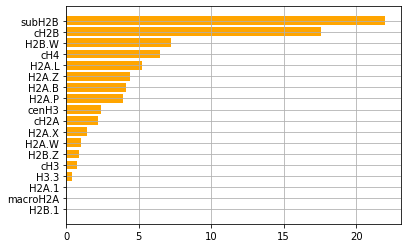

In [286]:
print(print(his_type_counter))

set_a = set(res['a_variant'].unique())
set_b = set(res['b_variant'].unique())
variants = set_a.union(set_b)

histone_types = {his: res.loc[res['a_variant']==his]['a_entity'].iloc[0] for his in set_a}
types_b = {his: res.loc[res['b_variant']==his]['b_entity'].iloc[0] for his in set_a if his not in histone_types}
histone_types.update(types_b)
print(histone_types)

his_dict = {}

for his in variants:
    req = res.loc[(res['a_variant']==his) | (res['b_variant']==his)]
    his_dict[his] = len(req) / his_type_counter[histone_types[his]]

his_dict = {res: his_dict[res] for res in 
                          sorted(his_dict, key=his_dict.get)}    
width = list(his_dict.values())
y = list(his_dict.keys())

plt.barh(y, width, color="orange")
plt.grid()

{'H1': 57, 'H2A': 172, 'H2B': 77, 'H3': 78, 'H4': 27}
None


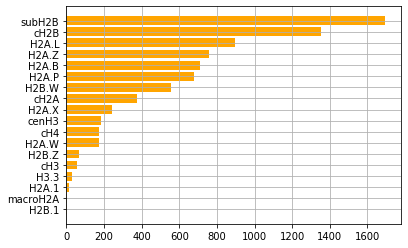

In [287]:
print(print(his_type_counter))

set_a = set(res['a_variant'].unique())
set_b = set(res['b_variant'].unique())
variants = set_a.union(set_b)


his_dict = {}


for his in variants:
    req = res.loc[(res['a_variant']==his) | (res['b_variant']==his)]
    his_dict[his] = len(req)

his_dict = {res: his_dict[res] for res in 
                          sorted(his_dict, key=his_dict.get)}    
width = list(his_dict.values())
y = list(his_dict.keys())

plt.barh(y, width, color="orange")
plt.grid()